# Import Modules

In [2]:
import pandas as pd

import utils

# Load Data

In [3]:
target_vegetable = "だいこん"
train_size = 4000

In [4]:
train = pd.read_csv("./data/train.csv")
train["date"] = pd.to_datetime(train["date"], format="%Y%m%d")

train["year"] = train.date.dt.year
years = pd.get_dummies(train["year"])
train = train.drop(columns="year")
train = pd.concat([train, years], axis=1)

train["month"] = train.date.dt.month
months = pd.get_dummies(train["month"])
train = train.drop(columns="month")
train = pd.concat([train, months], axis=1)

train["weekday"] = train.date.dt.weekday
weekdays = pd.get_dummies(train["weekday"])
train = train.drop(columns="weekday")
train = pd.concat([train, weekdays], axis=1)

areas = pd.get_dummies(train["area"])
train = train.drop(columns="area")
train = pd.concat([train, areas], axis=1)

target_values = utils.get_target_values(train, target_vegetable)
train_x, train_y, test_y, train, test, ss = utils.preprocess_data(target_values, train_size=train_size, T=10)

# Training

In [5]:
future = target_values.shape[0] - train_size
pred_y, _ = utils.pipeline_rnn(train_x, train_y, train, test, test_y, future=future, num_epochs=100)

training loss = 1.0119380950927734
test loss = 0.7467049360275269
training loss = 0.5092639923095703
test loss = 0.5923591256141663
training loss = 0.23990511894226074
test loss = 0.9534639716148376
training loss = 0.21135182678699493
test loss = 0.8181528449058533
training loss = 0.202738955616951
test loss = 0.528587818145752
training loss = 0.19945363700389862
test loss = 0.6485355496406555
training loss = 0.1966964155435562
test loss = 0.5907763838768005
training loss = 0.19502322375774384
test loss = 0.5977314710617065
training loss = 0.20058365166187286
test loss = 0.7904921770095825
training loss = 0.19551801681518555
test loss = 0.6467409729957581


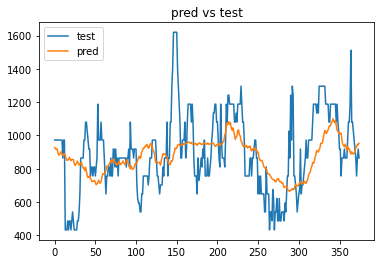

In [6]:
utils.plot_prediction(pred_y, test, ss)